In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import r2_score

In [2]:
ENEM = pandas.read_pickle('enem_2016.pkl')

In [3]:
#Agora não utilizaremos a nota da redacao
ENEM = ENEM.drop(columns=['NU_NOTA_REDACAO'])

In [4]:
#Utilizando 80% dos dados no treino e 20% no teste
msk = np.random.rand(len(ENEM))<0.8
train = ENEM[msk]
teste = ENEM[~msk]

In [5]:
print(len(train))
print(len(teste))

4676836
1168131


In [6]:
#O valor que queremos estimar está na coluna Q006: Renda mensal familiar
Y_train = list(train['Q006'])
X_train = train.drop(columns=['Q006']).get_values().tolist()

In [8]:
#Com apenas uma árvore
arvore_todos_os_parametros = tree.DecisionTreeRegressor()
arvore_todos_os_parametros = arvore_todos_os_parametros.fit(X_train, Y_train)

In [9]:
#Testando o modelo
Y_teste = list(teste['Q006'])
X_teste = teste.drop(columns=['Q006']).get_values().tolist()
Y_predicao = arvore_todos_os_parametros.predict(X_teste)
r2_score(Y_teste, Y_predicao)

0.3584165621384443

In [16]:
#Encontrando os coeficientes dos parametros
feat = arvore_todos_os_parametros.feature_importances_
print('Quantidade de pessoas em casa: '+str(feat[0]))
print('Empregada domestica: '+str(feat[1]))
print('Quantidade de banheiros: '+str(feat[2]))
print('Quantidade de quartos: '+str(feat[3]))
print('Quantidade de carros: '+str(feat[4]))
print('Quantidade de motos: '+str(feat[5]))
print('Quantidade de geladeiras: '+str(feat[6]))
print('Quantidade de freezer: '+str(feat[7]))
print('Quantidade de maquina de lavar roupa: '+str(feat[8]))
print('Quantidade de maquina de secar roupa: '+str(feat[9]))
print('Quantidade de micro-ondas: '+str(feat[10]))
print('Quantidade de maquina de lavar louça: '+str(feat[11]))
print('Aspirador de po: '+str(feat[12]))
print('Quantidade de televisões:'+str(feat[13]))
print('DVD: '+str(feat[14]))
print('TV por assinatura: '+str(feat[15]))
print('Quantidade de celulares: '+str(feat[16]))
print('Telefone fixo: '+str(feat[17]))
print('Quantidade de computadores: '+str(feat[18]))
print('Acesso a internet: '+str(feat[19]))

Quantidade de pessoas em casa: 0.042519652868038715
Empregada domestica: 0.12580401861163268
Quantidade de banheiros: 0.37845283361829185
Quantidade de quartos: 0.025237845370735746
Quantidade de carros: 0.11258054186603196
Quantidade de motos: 0.015025694848028945
Quantidade de geladeiras: 0.01660561965538586
Quantidade de freezer: 0.027718576315395267
Quantidade de maquina de lavar roupa: 0.013216647979674355
Quantidade de maquina de secar roupa: 0.018936206603774826
Quantidade de micro-ondas: 0.014128151837660897
Quantidade de maquina de lavar louça: 0.007684890348722401
Aspirador de po: 0.010493812969031015
Quantidade de televisões:0.03459444037230459
DVD: 0.015006620974466924
TV por assinatura: 0.026899617006989476
Quantidade de celulares: 0.026768712515458228
Telefone fixo: 0.010237280073966553
Quantidade de computadores: 0.0738435472260805
Acesso a internet: 0.004245288938329335


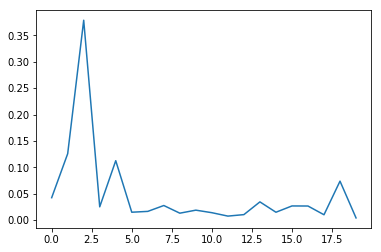

In [12]:
plt.plot(feat)
plt.show()

In [24]:
feat.sort()
feat[::-1][0:5]

array([0.37845283, 0.12580402, 0.11258054, 0.07384355, 0.04251965])

In [30]:
#Parametros mais significativos: Q008, Q007, Q010, Q024, Q005
#Q008: Quantidade de banheiros
#Q007: Empregada domestica
#Q010: Quantidade de carros
#Q024: Quantidade de computadores
#Q005: Quantidade de pessoas na casa 
ENEM_filtrado = ENEM[['Q006', 'Q008', 'Q007', 'Q010', 'Q024', 'Q005']]
mskf = np.random.rand(len(ENEM_filtrado))<0.8
trainf = ENEM_filtrado[msk]
testef = ENEM_filtrado[~msk]
Y_trainf = list(trainf['Q006'])
X_trainf = trainf.drop(columns=['Q006']).get_values().tolist()

In [34]:
arvore_parametros_filtrados = tree.DecisionTreeRegressor()
arvore_parametros_filtrados = arvore_parametros_filtrados.fit(X_trainf, Y_trainf)

In [35]:
#Testando o modelo
Y_testef = list(testef['Q006'])
X_testef = testef.drop(columns=['Q006']).get_values().tolist()
Y_predicaof = arvore_parametros_filtrados.predict(X_testef)
r2_score(Y_testef, Y_predicaof)

0.5618052778517717